In [1]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

import matplotlib.pyplot as plt

### Average Directional Index (ADX)
![alt text](ADXfomula.png "ADX Fomula")

In [2]:
data = pd.read_csv('../MyStrategy/GBPUSD_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
5011,2022-08-30 13:00:00+01:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 14:00:00+01:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 15:00:00+01:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 16:00:00+01:00,1.163399,1.167174,1.163399,1.165189,1.165189,0
5015,2022-08-30 17:00:00+01:00,1.165365,1.166521,1.164985,1.165189,1.165189,0


In [16]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

,open,high,low,close,adj close,volumn
timestamp,,,,,,
2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0
2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0
2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0
2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0
2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0
...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0


##### การใช้งาน
- บอกความแข็งแรงของแนวโน้ม
- ค่า +DI และ -DI ใช้วิเคราะห์หาทิศทางของเทรน 
- ADX > 25 หมายถึงเทรนแข็งแรง, ADX < 20 หมายถึงเทรนอ่อนแอ(อาจจะ Sideway)
- ช่วงไม่มีเทรนราคาอาจกำลังเปลี่ยนเทรนหรือมีความผันผวนสูง
- เส้น +DI ตัดขึ้นเหนือ -DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Long
- เส้น -DI ตัดขึ้นเหนือ +DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Short
- ใช้เป็นสัญญาณ Exit เช่น Long อยู่แล้วเส้น -DI ตัดขึ้น +DI
- การเกิด Divergence ของ ADX เป็นการแสดงถึงความเป็นแนวโน้มเริ่มอ่อนแรงลง
- สามารถประเมินโอกาสการ ผ่าน หรือ ไม่ผ่าน แนวรับ / แนวต้าน

##### ข้อจำกัด
- เส้น +DI, -DI ตัดกันอาจเกิดขึ้นบ่อยและบางครั้งเป็น False signal

อ้างอิงจาก 
* https://www.investopedia.com/terms/a/adx.asp
* https://thaibrokerforex.com/%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A5%E0%B9%88%E0%B8%99%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B8%94%E0%B8%B4/
* https://www.cwayinvestment.com/2012/06/average-directional-index-adx.html
* https://admiralmarkets.sc/th/education/articles/forex-indicators/adx-forex-indicator
* https://forexthai.in.th/adx-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3/
* https://www.lucid-trader.com/average-directional-index-adx/

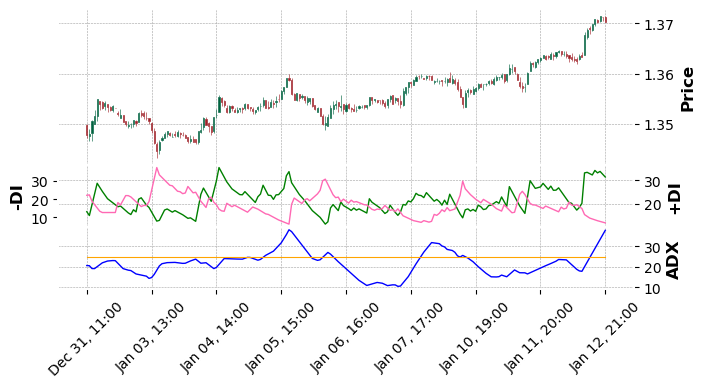

In [37]:
df.ta.adx(14, append=True)
start_date, end_date = '2021-12-31 10:45:00', '2022-01-12 21:45:00'

adx = df['ADX_14'].loc[start_date: end_date]
adxDMP= df['DMP_14'].loc[start_date: end_date]
adxDMN = df['DMN_14'].loc[start_date: end_date]

df_plot = df.loc[start_date: end_date]
adx_level = np.empty(df_plot.shape[0])
adx_level.fill(25)

adx_plot = mpf.make_addplot(adx, panel=2, color='blue', width=1, ylabel='ADX')
level_plot = mpf.make_addplot(adx_level, panel=2, color='orange', width=0.8)
adxDMP_plot = mpf.make_addplot(adxDMP, panel=1, color='green', width=1, ylabel='+DI')
adxDMN_plot = mpf.make_addplot(adxDMN, panel=1, color='hotpink', width=1, ylabel='-DI')

mpf.plot(df_plot, type='candle', style='charles',
         addplot=[adx_plot, level_plot, adxDMP_plot, adxDMN_plot],
         figsize=(8, 4))

##### ทดลองและสังเกตุว่าเหตุการณ์ใน ADX ส่งผลอะไรกับราคาสรุปออกมาเป็นสถิติ

ตัวอย่างผลที่เกิดขึ้น เช่น เกิด swing, แนวรับ, แนวต้าน, ราคาผันผวน, เปลี่ยนเทรน, sideway, เทรนไปต่อ, จุดสิ้นสุดเทรน

- [ ] +DI ตัดขึ้น -DI 
- [ ] -DI ตัดขึ้น +DI
- [ ] ADX > 25
- [ ] ADX < 20
- [ ] 20 < ADX < 25
- [ ] +DI ตัดขึ้น -DI และสังเกตุค่า ADX 
- [ ] -DI ตัดขึ้น +DI และสังเกตุค่า ADX
- [ ] ADX Divergence